<a href="https://colab.research.google.com/github/Jozefina-Gramatikova/demo_test/blob/main/heights_and_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/exNB.csv', header=None)


In [ ]:
data

,7.562675441204771687e+01,1.817044862628660553e+02,1.000000000000000000e+00
0,70.540408,176.177640,1.0
1,76.875023,178.667364,1.0
2,70.225610,157.504877,1.0
3,74.106298,168.525499,1.0
4,76.507482,172.765822,1.0
...,...,...,...
994,68.394140,141.464087,0.0
995,65.280727,138.177757,0.0
996,65.345827,135.199530,0.0
997,59.385331,152.598596,0.0


In [ ]:
X = data.to_numpy()

In [ ]:
X

array([[ 75.62675441, 181.70448626,   1.        ],
       [ 70.54040833, 176.17763989,   1.        ],
       [ 76.87502316, 178.66736388,   1.        ],
       ...,
       [ 65.34582701, 135.19952982,   0.        ],
       [ 59.38533074, 152.59859562,   0.        ],
       [ 68.708487  , 129.95783574,   0.        ]])

In [ ]:
y = X[:, -1] #the last column

In [ ]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
X=X[:,:-1] #from the beginning to the last one

In [ ]:
X

array([[ 75.62675441, 181.70448626],
       [ 70.54040833, 176.17763989],
       [ 76.87502316, 178.66736388],
       ...,
       [ 65.34582701, 135.19952982],
       [ 59.38533074, 152.59859562],
       [ 68.708487  , 129.95783574]])

In [ ]:
X[0][0]

75.62675441204772

In [ ]:
y.shape

(1000,)

In [ ]:
X.shape

(1000, 2)

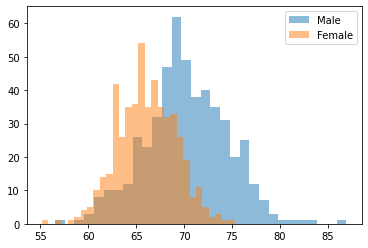

In [ ]:
plt.figure()
plt.hist(X[y==1,0], label="Male", alpha=0.5, bins=30)
plt.hist(X[y==0,0], label="Female", alpha=0.5, bins=30)
plt.legend()

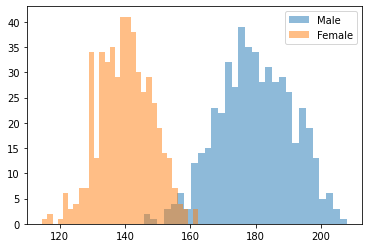

In [ ]:
plt.figure()
plt.hist(X[y==1,1], label="Male", alpha=0.5, bins=30)
plt.hist(X[y==0,1], label="Female", alpha=0.5, bins=30)
plt.legend()

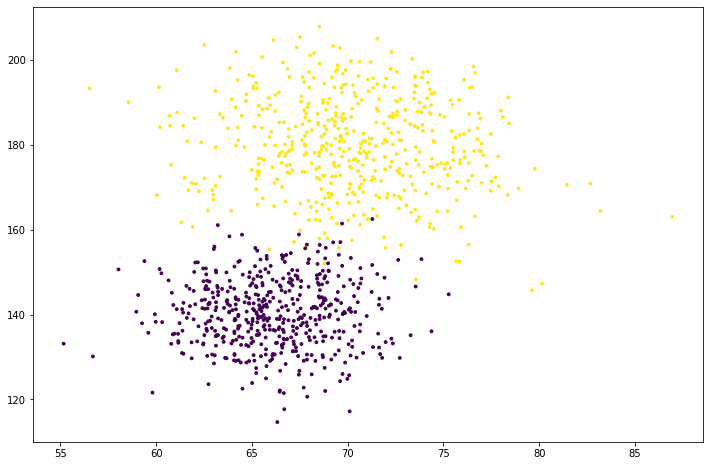

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], c=y, s=8) #decision line, naive baise classifier

In [ ]:
class GaussNB(): #Gaussian Naive Baise

  def fit(self, X, y, epsilon=1e-3): #the fit method; self creates a global variable withing the class its like a memory
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]

      #we are going to populate our likelihoods
      self.likelihoods[k]={"mean": X_k.mean(axis=0), 'cov': X_k.var(axis=0)+ epsilon}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):

    N, D = X.shape
    P_hat = np.zeros((N, len(self.K))) #predicted probability
    
    for k,l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l['mean'], l['cov']+np.log(self.priors[k])) #probability density function

    return P_hat.argmax(axis=1)


In [ ]:
gnb = GaussNB()

In [ ]:
gnb.fit(X,y)


In [ ]:
y_hat=gnb.predict(X)

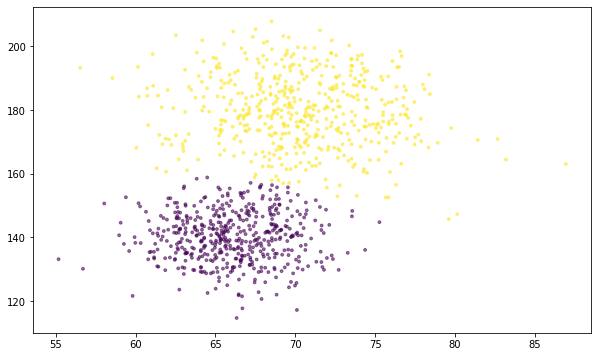

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_hat, alpha = 0.55, s=8)

In [ ]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
accuracy(y, y_hat)

0.986